In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json("spam2-up.json")
data["message"] = data[0]
data["type"] = 1
data

,0,message,type
0,"최 상 위 클래쓰부터 남다름! 지금 즉시 입장! 프리미엄 코드: *, 3만원 드림!","최 상 위 클래쓰부터 남다름! 지금 즉시 입장! 프리미엄 코드: *, 3만원 드림!",1
1,"[no.1] 압도적 클라스! 지금 바로 합류하세요! 가입 선물 30,000 포인트!...","[no.1] 압도적 클라스! 지금 바로 합류하세요! 가입 선물 30,000 포인트!...",1
2,남다른 '선택'의 기준! 프리미엄 경험! 웰컴 기프트 3만원! 출금자유! 비밀 초대...,남다른 '선택'의 기준! 프리미엄 경험! 웰컴 기프트 3만원! 출금자유! 비밀 초대...,1
3,1st 등극? 새롭게 태어난 당신을 위한 기회! 가입 3만원! 즉시 출금! 문의는 ...,1st 등극? 새롭게 태어난 당신을 위한 기회! 가입 3만원! 즉시 출금! 문의는 ...,1
4,"(최고급) 프.리.미.엄.급. 혜택! 처음 오신 분께만 드려요! 30,000p 지급...","(최고급) 프.리.미.엄.급. 혜택! 처음 오신 분께만 드려요! 30,000p 지급...",1
...,...,...,...
2156,"\*\* 단돈 십만, 사흘만에 이천 사백 넘게? 꿈이 현실로\~ 이 기회 놓치면 후...","\*\* 단돈 십만, 사흘만에 이천 사백 넘게? 꿈이 현실로\~ 이 기회 놓치면 후...",1
2157,\*\*10만원이 2435만원으로... 3일 만에. 비결은?\*\* 지금 바로 비법...,\*\*10만원이 2435만원으로... 3일 만에. 비결은?\*\* 지금 바로 비법...,1
2158,\*\*십만냥으로 삼일만에 억소리나는 부자 되기 도전!\*\* 선착순 무료 시범 운...,\*\*십만냥으로 삼일만에 억소리나는 부자 되기 도전!\*\* 선착순 무료 시범 운...,1
2159,"\*\*백k로 시작, 72시간 내 24m 이상 폭발적 수익! 비공개 채널\*\* 선...","\*\*백k로 시작, 72시간 내 24m 이상 폭발적 수익! 비공개 채널\*\* 선...",1


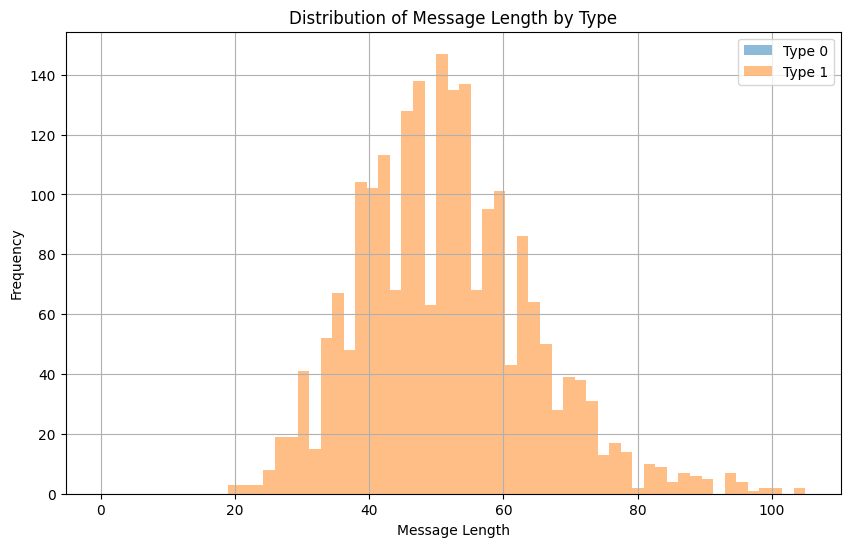

In [4]:
# Calculate the length of the message for each row
data['message_length'] = data['message'].apply(len)

# Separate data by type
data_type_0 = data[data['type'] == 0]
data_type_1 = data[data['type'] == 1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histogram for type 0
plt.hist(data_type_0['message_length'], bins=50, alpha=0.5, label='Type 0')

# Plot histogram for type 1
plt.hist(data_type_1['message_length'], bins=50, alpha=0.5, label='Type 1')

# Add title and labels
plt.title('Distribution of Message Length by Type')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [5]:
data.isnull().values.any()

np.False_

In [6]:
data['message'].nunique()

2161

<Axes: xlabel='type'>

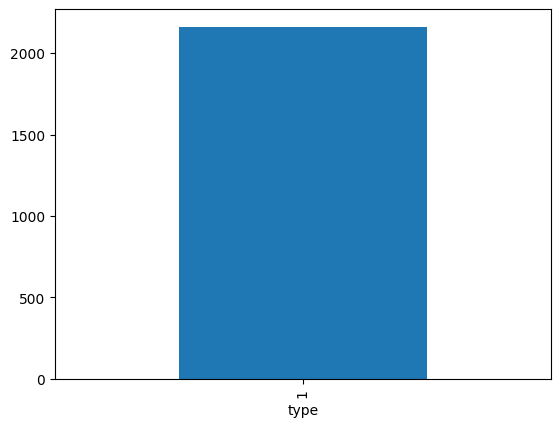

In [7]:
data['type'].value_counts().plot(kind='bar')

In [8]:
# 토큰화
from tqdm import tqdm
from kiwipiepy import Kiwi

kiwi = Kiwi(num_workers=32)
tqdm.pandas()

def get_tokens(text):
    if pd.isna(text) or not text:
        return []
    tokens = kiwi.tokenize(str(text))
    filtered_tokens = []
    for token in tokens:
        if token.tag[0] in ['N', 'V', 'M', 'S', 'U', 'W']:
            filtered_tokens.append(token.form)
    return filtered_tokens

data['tokens'] = data['message'].progress_apply(get_tokens)

100%|██████████| 2161/2161 [00:02<00:00, 782.22it/s] 


In [9]:
del data[0]
del data["message"]
del data["message_length"]
data.to_json("test-kiwi.json", orient='records', force_ascii=False)